##### (check PYTHONPATH)

In [1]:
pwd

'/Users/nielsbidault/cernbox/Python/EBISSimulation/demo'

In [2]:
cd ..

/Users/nielsbidault/cernbox/Python/EBISSimulation


### Import ebisim and all packages needed:

In [3]:
# Import what we need
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 60
#%matplotlib notebook
import ebisim

In [4]:
ELEMENT = "K"
species = ebisim.EBISSpecies(ELEMENT)

# Poisson equation solver:

### Initialize Poisson equation solver

In [5]:
print(species)
problem = ebisim.problems.ComplexEBISProblem("K", 50, 9000, 15)
sc_problem = ebisim.PoissonSolver(ELEMENT, 0.3, 9000, nb_p=1000)

EBISSpecies - Element: Potassium (K, Z = 19)


### Solve the charge dynamics evolution

In [6]:
_ = problem.solve(1.2, method="BDF")
sol_t = problem.solution.t
sol_y = problem.solution.y
sol_y[0, :] = 0

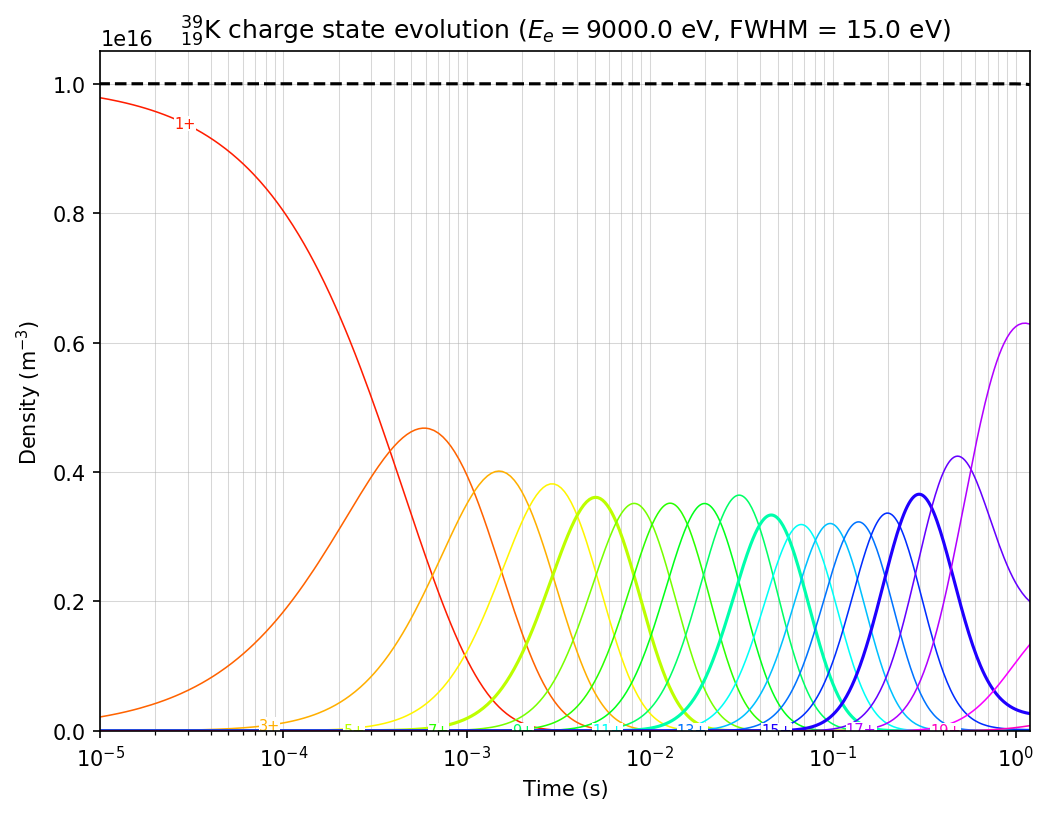

In [13]:
fig =problem.plot_cs_evo()
plt.show()

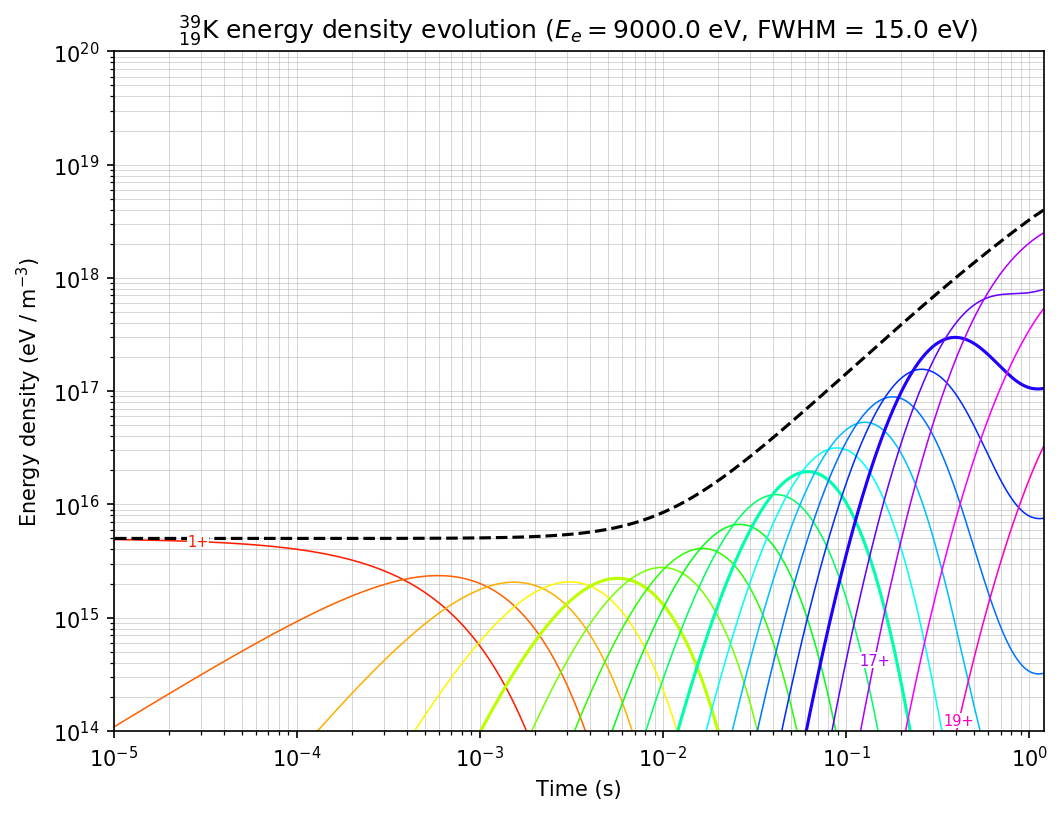

In [8]:
fig2 = problem.plot_energy_evo()
plt.show()

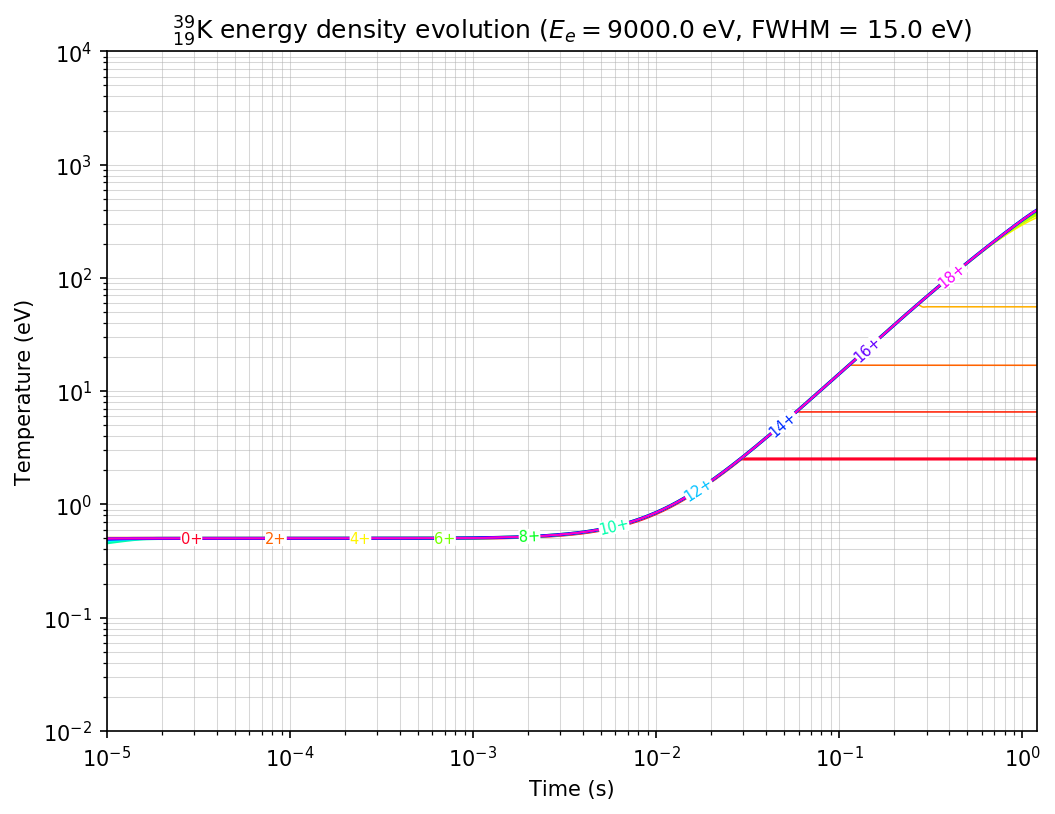

In [9]:
fig3 = problem.plot_temperature_evo()
plt.show()

### Solve the space-charge problem

In [10]:
pb = ebisim.PoissonSolver(ELEMENT, 0.3, 9000, nb_p=1000)
model = ['boltzmann', 'gaussian']
%timeit
for i in range(len(sol_y[1, :])):
    _ = pb.solve(sol_y[:, i], model=model)

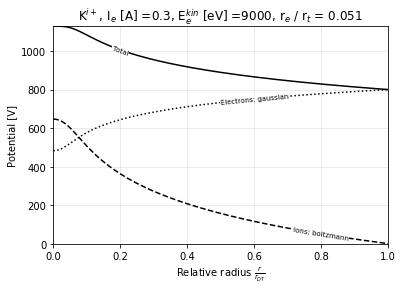

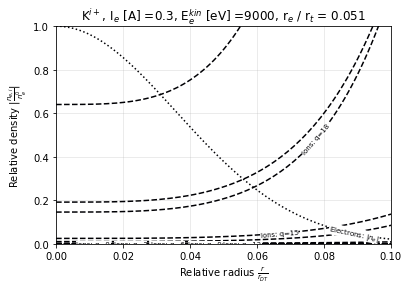

In [11]:
_ = pb.plot_sol_potentials()
plt.show()
_ = pb.plot_sol_densities()
plt.show()

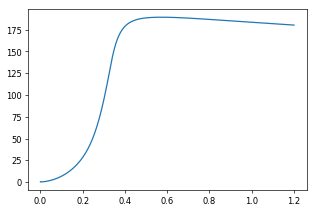

In [14]:
plt.plot(sol_t, pb.sol_df_densities['alpha_rh'])
plt.show()

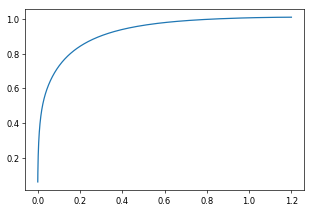

In [22]:
plt.plot(sol_t,abs(pb.sol_df_densities['rho_i_y0'] / pb.sol_df_densities['rho_e_y0']))

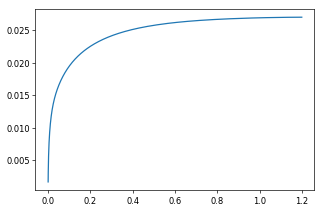

In [19]:
plt.plot(sol_t, pb.sol_df_densities['rho_i_y0'])

In [39]:
alpha = pb.sol_df_densities['N_i_rh'] / pb.sol_df_densities['N_e_rh']
beta = pb.sol_df_densities['N_i_dt'].values / pb.sol_df_densities['N_e_dt']

0    [0.0, 0.0010398997874455512, 0.0, 0.0, 0.0, 0....
0    [0.0, 0.0010398997874455512, 1.122998096782172...
0    [0.0, 0.0010398997874455512, 3.939693728868667...
0    [0.0, 0.0010398997874455512, 5.244986362316773...
0    [0.0, 0.0010398997874455512, 4.828438515806996...
0    [0.0, 0.0010398997874455512, 7.190334579730517...
0    [0.0, 0.0010398997874455512, 9.230587831868168...
0    [0.0, 0.0010398997874455512, 7.881001253415934...
0    [0.0, 0.0010398997874455512, 4.649258689768765...
0    [0.0, 0.0010398997874455512, 1.059149521298044...
0    [0.0, 0.0010398997874455512, 6.144855599239189...
0    [0.0, 0.0010398997874455512, 1.026446994480797...
0    [0.0, 0.0010398997874455512, 1.432099499687348...
0    [0.0, 0.0010398997874455512, 3.073086042786793...
0    [0.0, 0.0010398997874455512, 4.251979381188151...
0    [0.0, 0.0010398997874455512, 5.443770447213732...
0    [0.0, 0.0010398997874455512, 6.639094860621063...
0    [0.0, 0.0010398997874455512, 7.832198281732419...
0    [0.0,